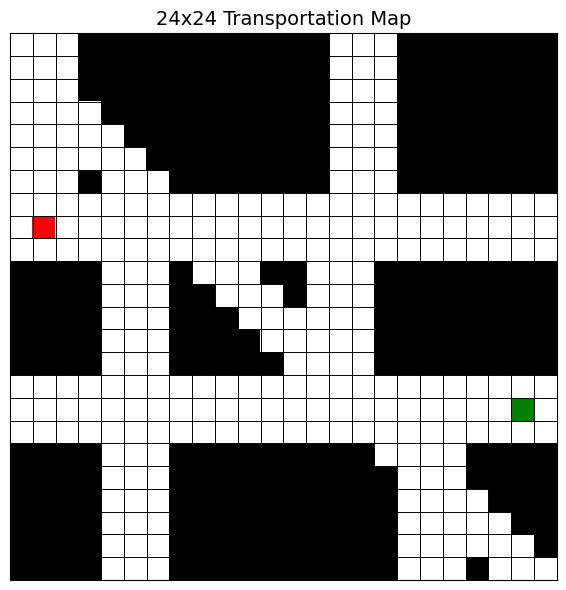

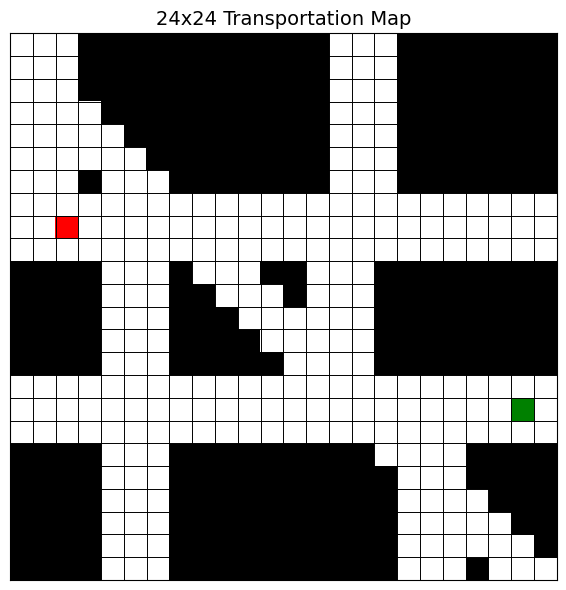

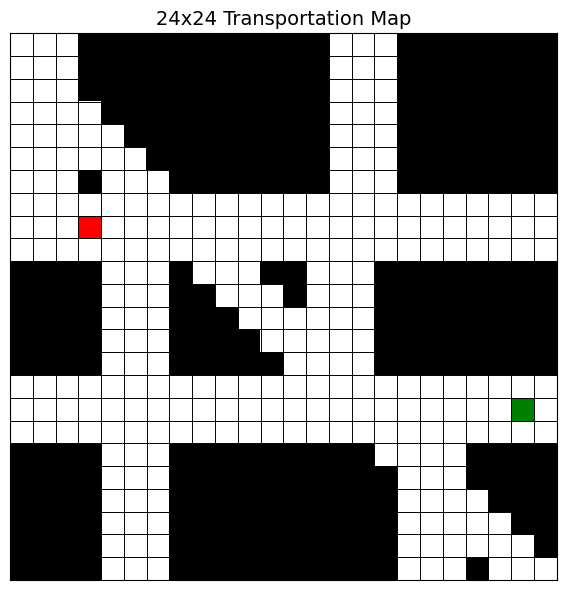

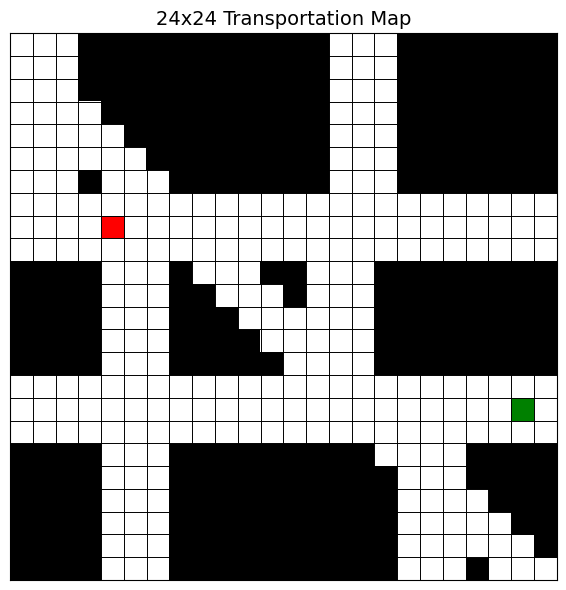

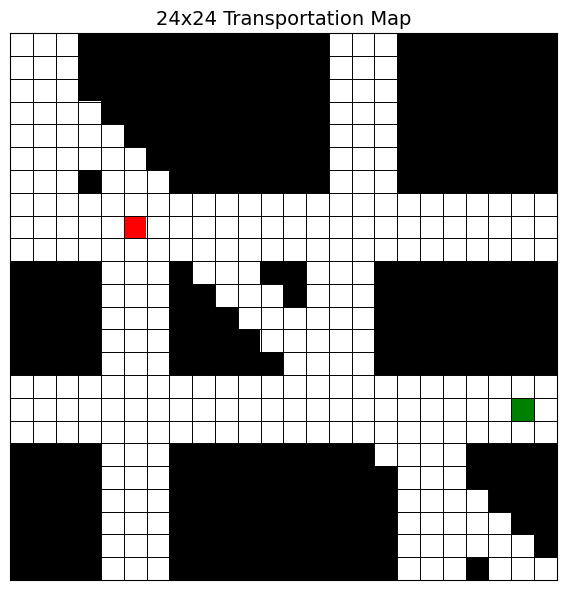

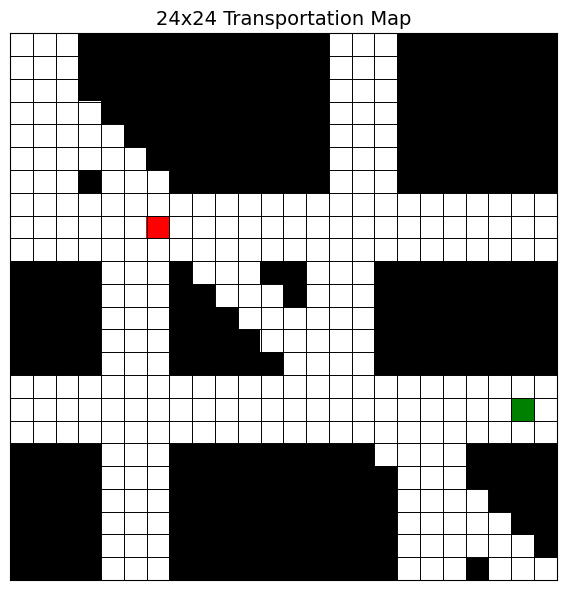

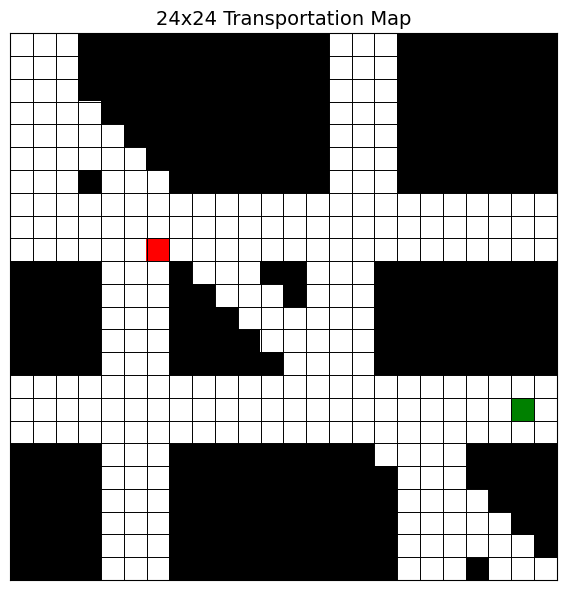

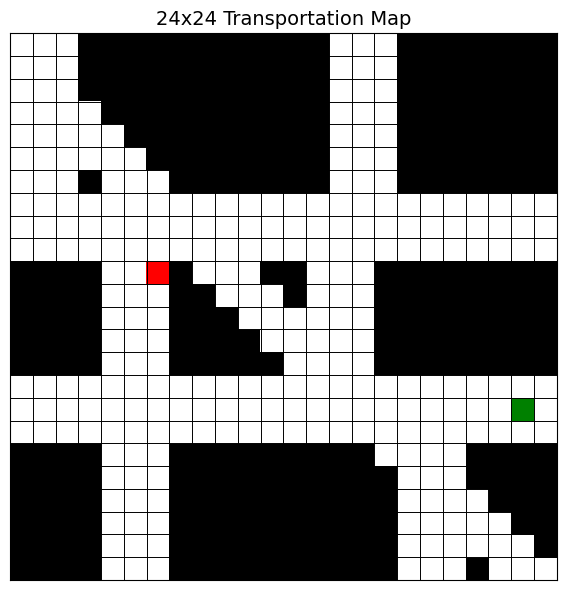

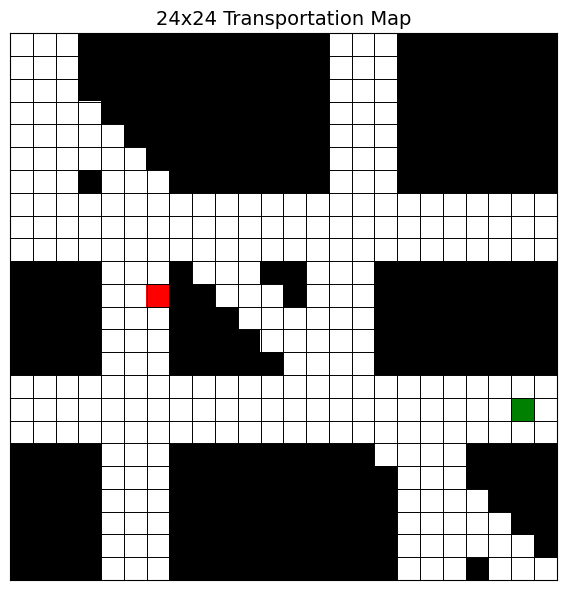

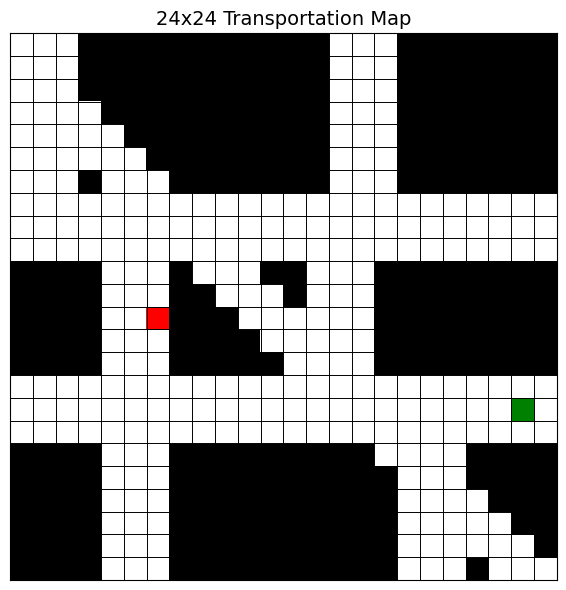

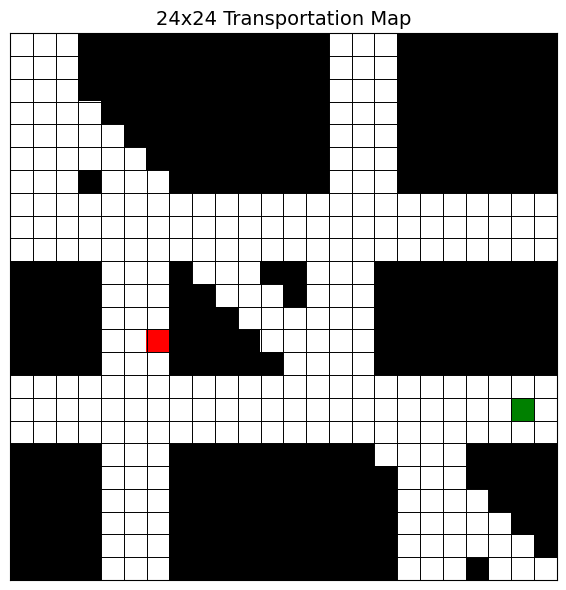

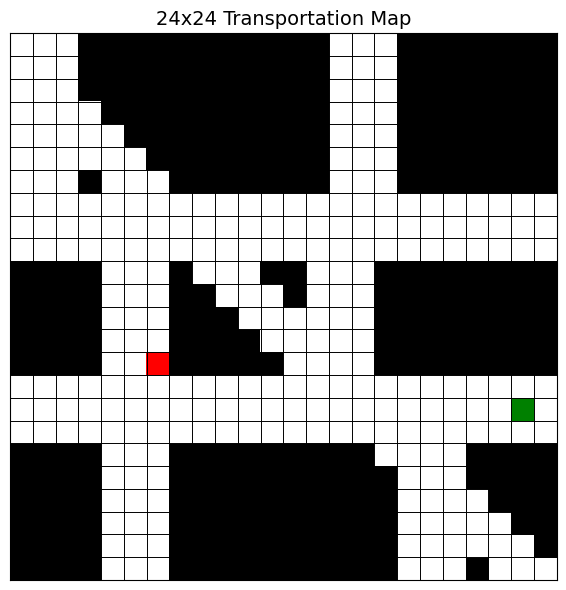

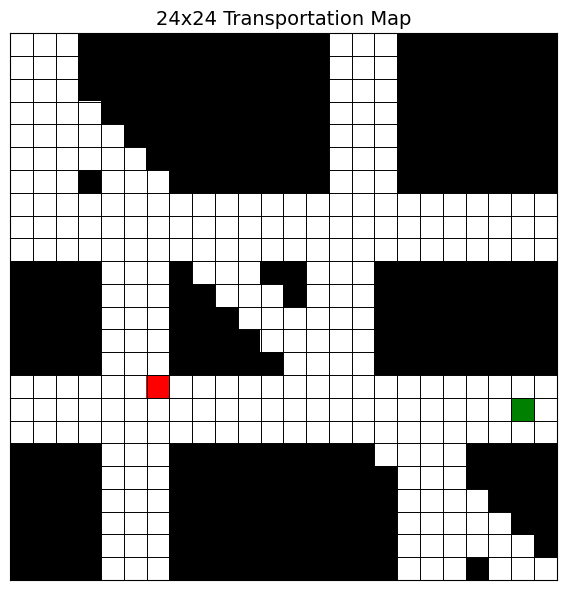

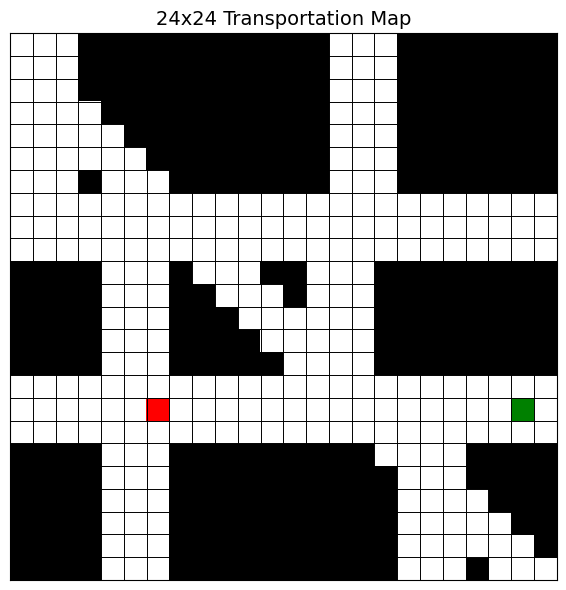

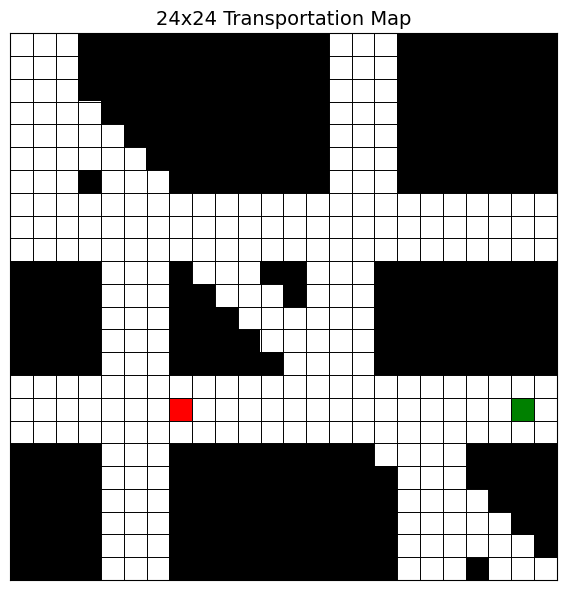

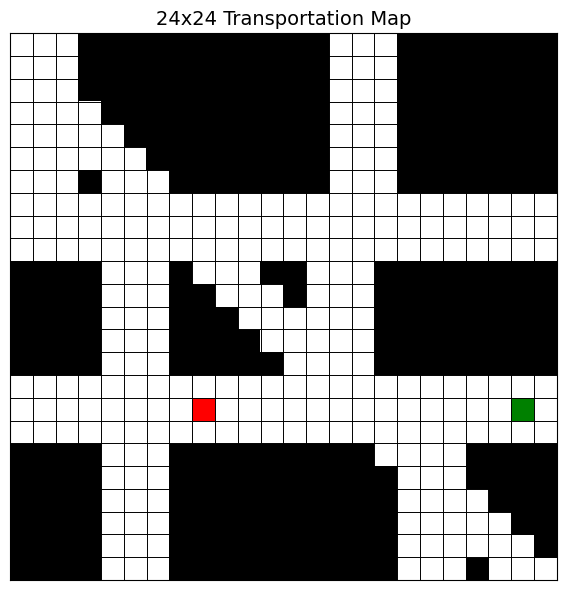

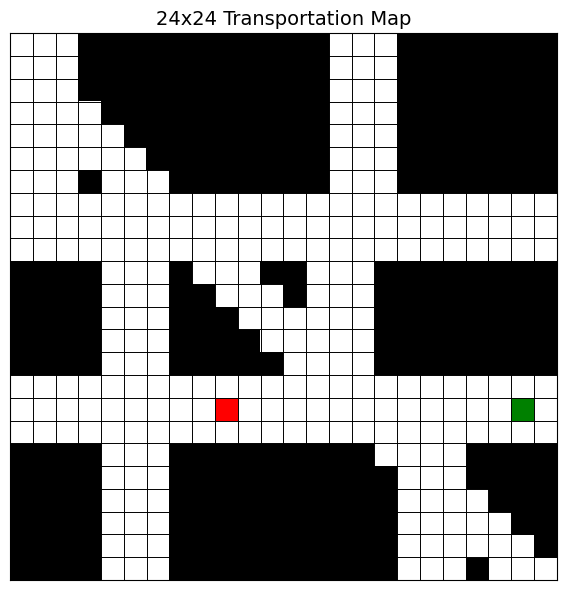

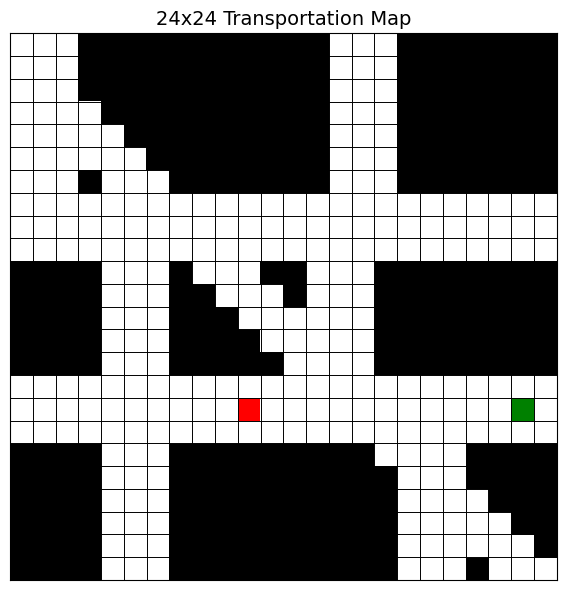

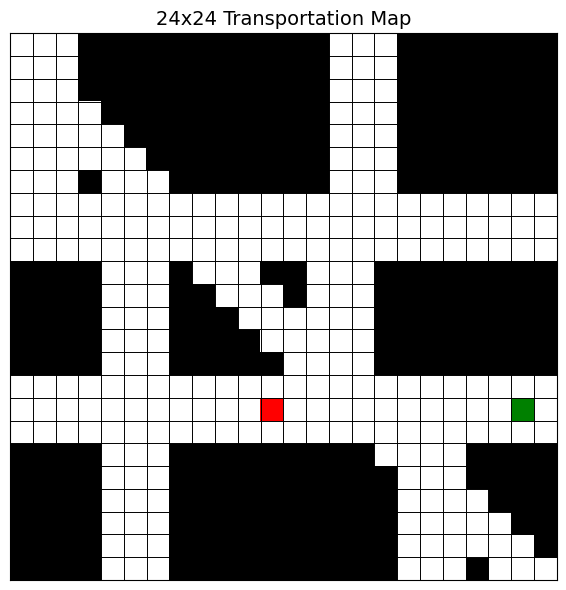

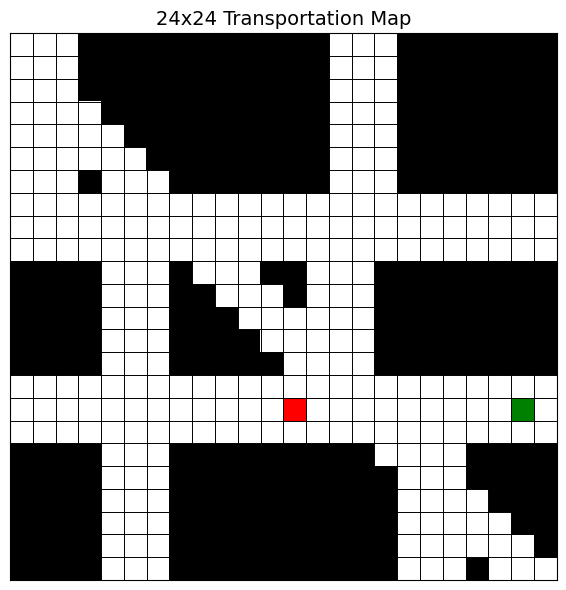

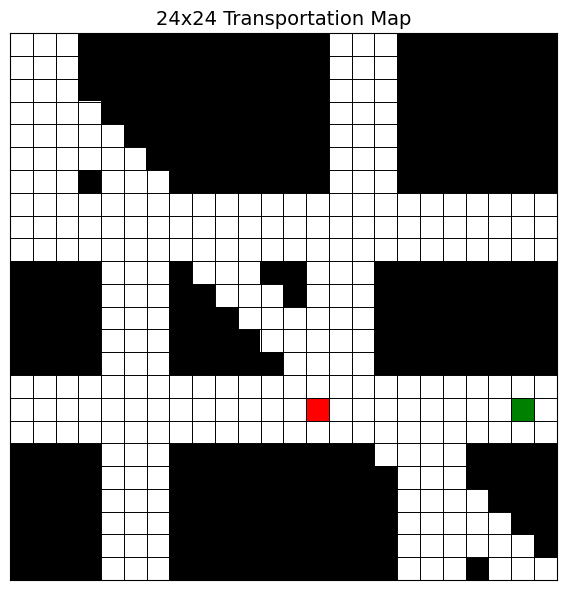

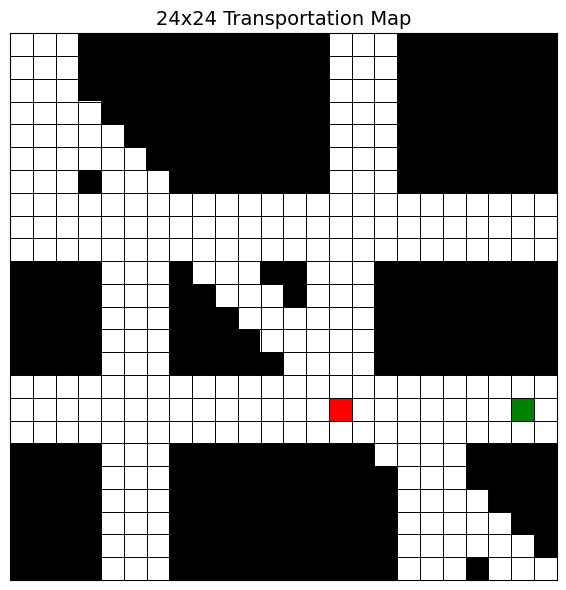

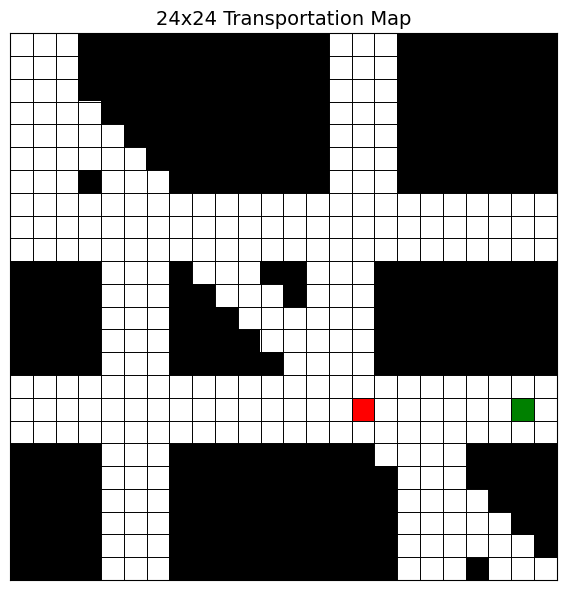

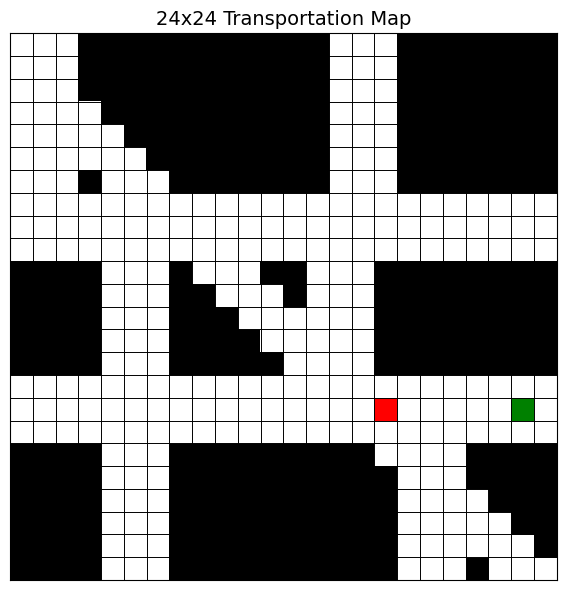

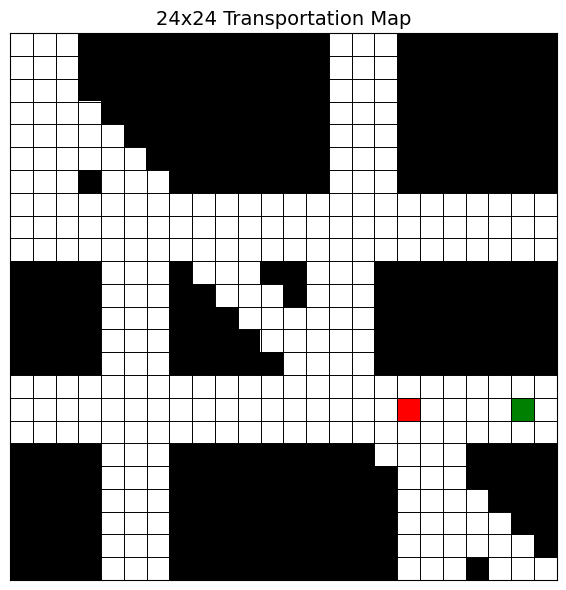

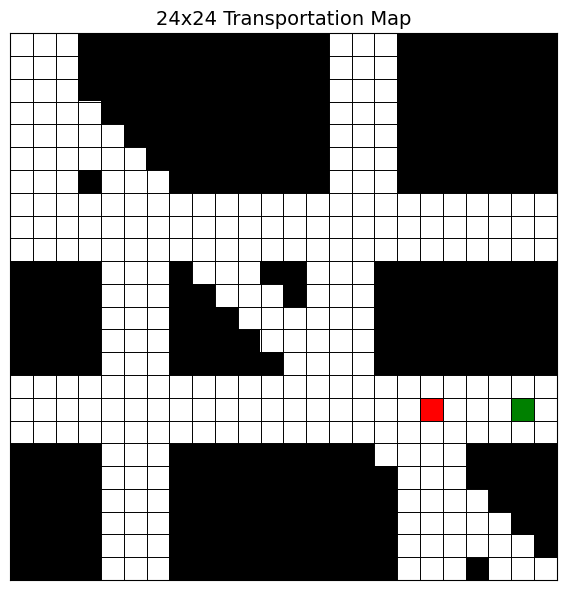

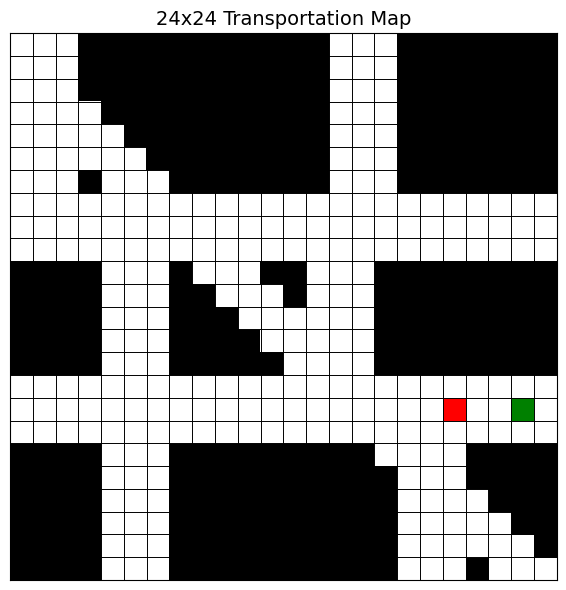

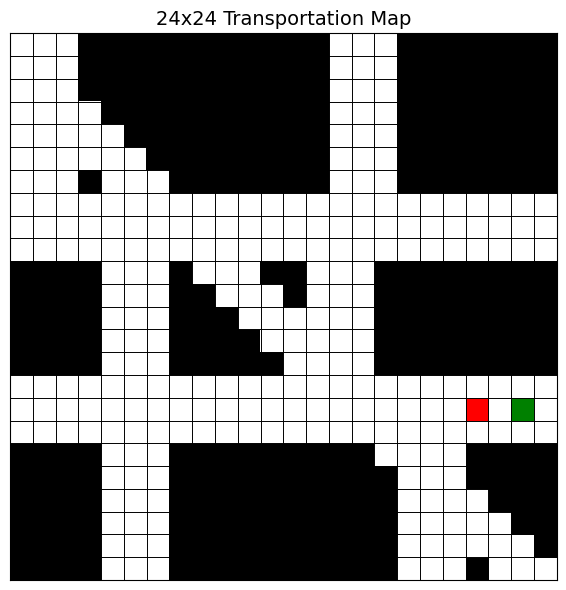

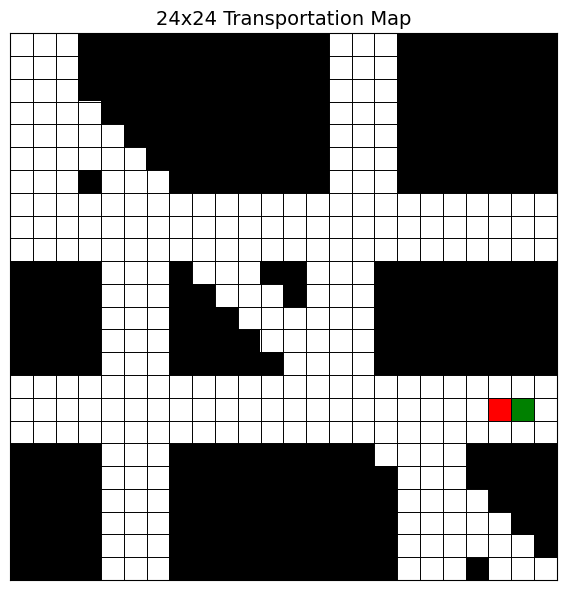

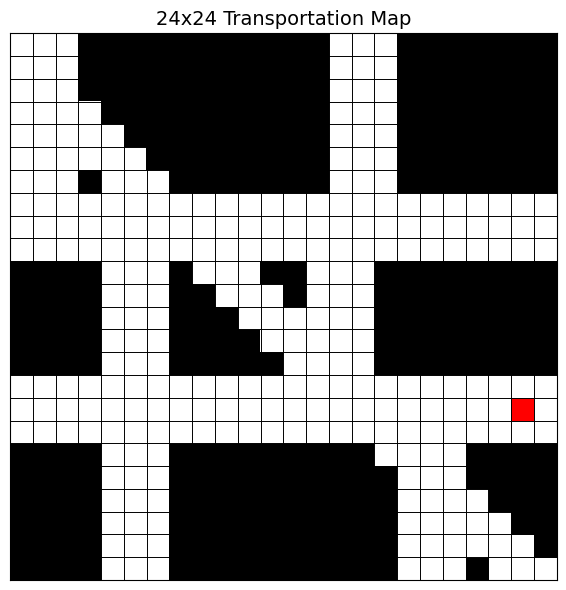

<<< Win >>>
===== Inference Done =====
(30, 3, 24, 24) <class 'numpy.ndarray'>


Proceed?(Enter "go" to proceed, "done" to stop.):  done


Inference terminated...


In [1]:
from lib.env_manager_final import PathFindEnv
from lib.dqn_utils_final import ReplayMemory, DQN
from IPython.display import clear_output

env = PathFindEnv(height=24, width=24)
dqn = DQN(train=False, input_size=24)

checkpoints = ["checkpoint8_30_1_90_6326_7329_2025-09-13.pth",
             "checkpoint8_30_2_90_6300_7015_2025-09-14.pth"]
env_info_files = ["env8_30_1_2025-09-13.obj",
                 "env8_30_2_2025-09-14.obj"]
ep_replay = None

stop = False
for pathes in zip(checkpoints, env_info_files):
    clear_output(wait=True)

    # env_info: (tp_map, src_pos, dest_pos)
    env_info = env.restore(pathes[1]) # 환경 복원
    # ep_replay: 에피소드 진행 과정에서의 모든 스텝 기록
    ep_replay = dqn.inference(env=env, init_state=env_info[0], checkpoint=pathes[0], verbose=True)
    print(ep_replay.shape, type(ep_replay))

    while True:
        keyward = input("Proceed?(Enter \"go\" to proceed, \"done\" to stop.): ")
        match keyward:
            case "go":
                break
            case "done":
                stop = True
                print("Inference terminated...")
                break
            case _:
                print("Wrong keyward input. Please rewrite right keyward...")
                continue

    # 추론을 정지하는 경우
    if stop:
        break